## Linear Regression
* relationship between independent (predictor, features, input) and dependent (response, target, label, output) variables

### Simple linear regression model can be described with below equation:
* y = a + b * x
  * y: response, x: predictor, a, b: constant coefficients
    * a: intercept, b: slope

In [1]:
#import libraries
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualization
from sklearn.linear_model import LinearRegression #ML library

In [2]:
#Generate random sample data
x=list(range(120))
y=np.random.randint(1,15,120)+x

x_train=np.array(x)
y_train=np.array(y)

In [3]:
#Checking the elements of x_train and y_train arrays
print("x:",x_train[0:10], "\ny:",y_train[0:10])

x: [0 1 2 3 4 5 6 7 8 9] 
y: [10 13  3 10 11 17 16  9 16 19]


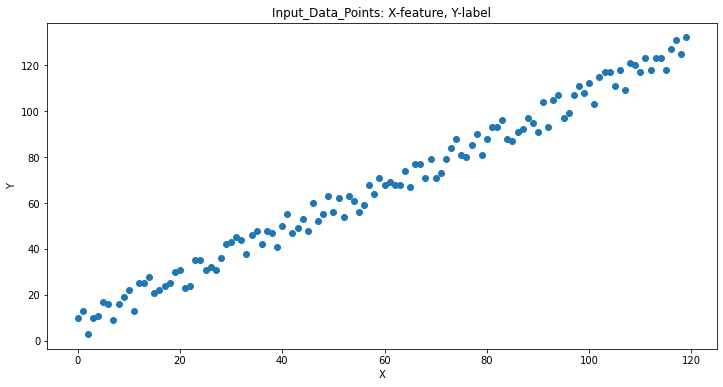

In [4]:
#Plotting data_points
plt.figure(figsize=(12,6))
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Input_Data_Points: X-feature, Y-label')
plt.show()

In [5]:
print('shape of raw data:x_train', x_train.shape)
print('shape of raw data:y_train', y_train.shape)

shape of raw data:x_train (120,)
shape of raw data:y_train (120,)


## Adding dimensions to numpy.arrays: newaxis vs reshape vs expand_dims
* numpy. newaxis is used to increase the dimension of the existing array by one more dimension

#### One reason to use numpy.newaxis over ndarray.reshape: 
* when you have more than one "unknown" dimension to operate with. for example:

In [6]:
x=list(range(120))
X=np.array(x)
print(X.shape)
print(np.expand_dims(X, axis=1).shape)#axis=0 for rows, axis=1 for columns                                                             
print(X[:, np.newaxis].shape)
print(X.reshape(-1, 1).shape)


(120,)
(120, 1)
(120, 1)
(120, 1)


In [7]:
X1 = np.array([[1, 2, 3], [4, 5, 6]], np.int32)
print(X1.shape)
print(np.expand_dims(X1, axis=1).shape)                                                                  
print(X1[:, np.newaxis, :].shape)
#print(X1.reshape(-1, 1, -1).shape)
#ValueError: can only specify one unknown dimension

(2, 3)
(2, 1, 3)
(2, 1, 3)


In [8]:
print('shape of x_train:',x_train[:,np.newaxis].shape)
print('shape of y_train:',y_train[:,np.newaxis].shape)

shape of x_train: (120, 1)
shape of y_train: (120, 1)


In [9]:
#Build linear model and fit a test data
model = LinearRegression(fit_intercept=True)
model.fit(x_train[:,np.newaxis], y_train[:,np.newaxis])

LinearRegression()

In [10]:
#Prediction
yfit=model.predict(x_train[:,np.newaxis])

In [11]:
#Understand yfit (predicted label)
print(yfit.shape)

(120, 1)


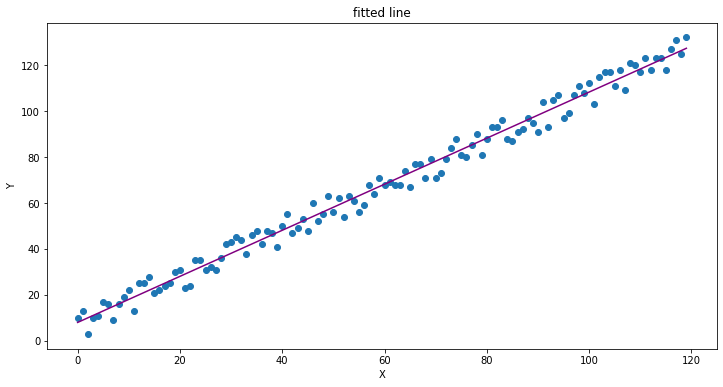

In [12]:
#Plotting the results.
plt.figure(figsize=(12,6))
plt.scatter(x_train, y_train)
plt.plot(x_train, yfit, color='purple')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('fitted line')
plt.show()

In [13]:
#finally, we check model by calculating coefficients manually, 
#we use y=a+bx formula to calculate elements of x_train array and compare them with yfit outputs
print("Coef:",model.coef_, " Intercept:",model.intercept_)

Coef: [[1.00226752]]  Intercept: [8.02341598]


In [14]:
print(model.intercept_+model.coef_*[1,2,3,4]) #using formula

print(yfit[1:5]) #using model_prediction


[[ 9.0256835  10.02795102 11.03021853 12.03248605]]
[[ 9.0256835 ]
 [10.02795102]
 [11.03021853]
 [12.03248605]]


#### The results are the same


## Polynomial Regression (nonlinear)
* It is a nonlinear relationship between independent x and dependent y variables

In [15]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [16]:
#Generate data or use your own dataset
n = 450 #no. of data
x = list(range(n))
x = [i/100 for i in x]


def GetPolyData(x):    
    return np.sin(x) + np.random.uniform(-.2, .2, n) #between the two specified numbers

y = GetPolyData(x)
x_train1 = np.array(x)
y_train1 = np.array(y)

print('shape x_train:',x_train1.shape)
print('shape y_train:',y_train1.shape)

shape x_train: (450,)
shape y_train: (450,)


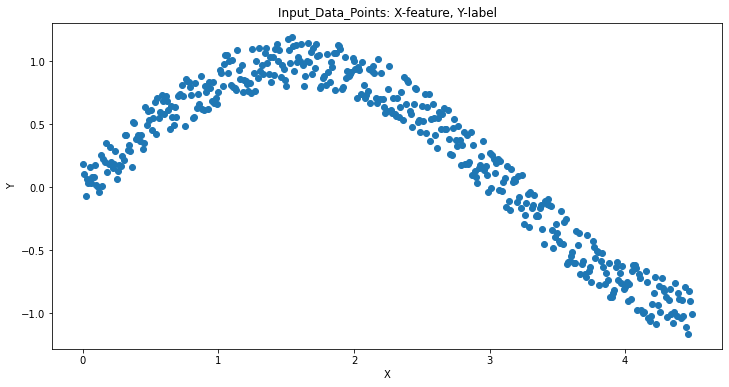

In [17]:
#check data visually by creating a scatter plot
plt.figure(figsize=(12,6))
plt.scatter(x_train1, y_train1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Input_Data_Points: X-feature, Y-label')
plt.show()

### polynomial feature would be the addition of a new feature (column) 
* where values were calculated by squaring the values in X, e.g. degree=4: X^4

In [18]:
#reshape
print('shape of x_train1:',x_train1.reshape(-1, 1).shape)

#Define the polynomial model with PolymonialFeatures class fit it on training data
polyModel = PolynomialFeatures(degree = 4)
xpol = polyModel.fit_transform(x_train1.reshape(-1, 1)) 
print('shape of poly_features:',xpol.shape)
print('shape of y_train1:', y_train1.reshape(-1,1).shape)

#Generate polynomial and interaction features
preg = polyModel.fit(xpol,y_train1)
print(preg)

shape of x_train1: (450, 1)
shape of poly_features: (450, 5)
shape of y_train1: (450, 1)
PolynomialFeatures(degree=4)


In [19]:
#need a linear model and we'll define it and fit on training data. Then we'll predict the x data with the model
liniearModel = LinearRegression(fit_intercept = True)
l=liniearModel.fit(xpol, y_train1[:, np.newaxis])
polyfit = liniearModel.predict(preg.fit_transform(x_train1.reshape(-1, 1)))
print(l)

LinearRegression()


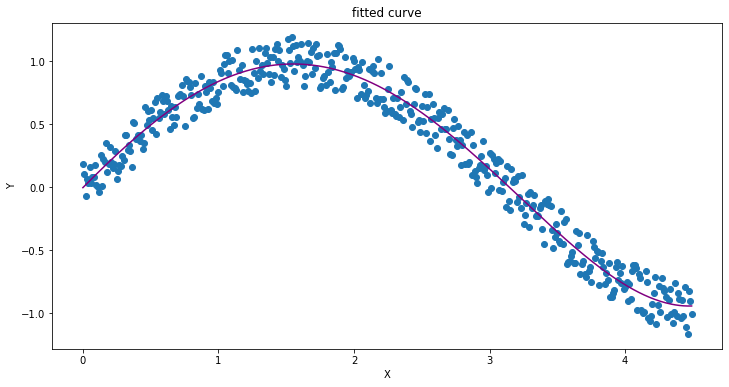

In [20]:
#plot the fitted curve
plt.figure(figsize=(12,6))
plt.scatter(x_train1, y_train1)
plt.plot(x_train1, polyfit, color = 'purple')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('fitted curve')
plt.show()

### Take-home-point:
#### LinearRegression fits a linear model with coefficients to minimize the residual sum of squares between actual and predicted
* measure the discrepancy between the data and an estimation model

### See also:
1. sklearn.linear_model.Ridge
   * Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients with l2 regularization.

2. sklearn.linear_model.Lasso
    * The Lasso is a linear model that estimates sparse coefficients with l1 regularization.

3. sklearn.linear_model.ElasticNet
    * Elastic-Net is a linear regression model trained with both l1 and l2 -norm regularization of the coefficients.